<a href="https://colab.research.google.com/github/grimar777/Grig-s-Project/blob/main/football_players_eda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import files
uploaded = files.upload()

Saving fifa_players.csv to fifa_players.csv


In [3]:
# ============================================================================
# FIFA FOOTBALL PLAYERS DATA ANALYSIS - COMPLETE PIPELINE
# ============================================================================
# This notebook performs comprehensive EDA, data cleaning, and feature engineering
# on FIFA football players dataset from Kaggle
#
# Dataset columns: name, age, height_cm, weight_kgs, positions, nationality,
# overall_rating, potential, value_euro, wage_euro, and many skill attributes
# ============================================================================

# SECTION 1: SETUP AND DATA LOADING
!pip install pandas numpy matplotlib seaborn

# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set visualization style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

# Load the dataset
df = pd.read_csv('fifa_players.csv')

print("Dataset loaded successfully!")
print(f"Dataset shape: {df.shape}")
print(f"Total players: {df.shape[0]}")
print(f"Total features: {df.shape[1]}")


Dataset loaded successfully!
Dataset shape: (17954, 51)
Total players: 17954
Total features: 51


In [4]:
"""
EDA (Exploratory Data Analysis) is the process of analyzing and investigating
datasets to discover patterns, spot anomalies, test hypotheses, and check
assumptions through summary statistics and graphical representations.

For FIFA players, we want to understand:
- Player demographics (age, nationality, positions)
- Physical attributes (height, weight)
- Performance metrics (ratings, skills)
- Economic factors (value, wages)
- Skill distributions across different attributes
"""

# 2.1: INITIAL DATA INSPECTION
# ============================================================================
print("\n" + "="*80)
print("INITIAL DATA INSPECTION")
print("="*80)

# Display first few rows
print("\n--- First 5 rows of the dataset ---")
print(df.head())

# Display last few rows
print("\n--- Last 5 rows of the dataset ---")
print(df.tail())

# Get basic information about the dataset
print("\n--- Dataset Information ---")
print(df.info())

# Get statistical summary
print("\n--- Statistical Summary ---")
print(df.describe())

# Display sample of a specific player (if name column exists)
if 'name' in df.columns:
    print("\n--- Sample Player Profile ---")
    sample_player = df.sample(1)
    for col in df.columns:
        print(f"{col}: {sample_player[col].values[0]}")


INITIAL DATA INSPECTION

--- First 5 rows of the dataset ---
           name                       full_name birth_date  age  height_cm  \
0      L. Messi  Lionel Andrés Messi Cuccittini  6/24/1987   31     170.18   
1    C. Eriksen    Christian  Dannemann Eriksen  2/14/1992   27     154.94   
2      P. Pogba                      Paul Pogba  3/15/1993   25     190.50   
3    L. Insigne                 Lorenzo Insigne   6/4/1991   27     162.56   
4  K. Koulibaly               Kalidou Koulibaly  6/20/1991   27     187.96   

   weight_kgs  positions nationality  overall_rating  potential  ...  \
0        72.1   CF,RW,ST   Argentina              94         94  ...   
1        76.2  CAM,RM,CM     Denmark              88         89  ...   
2        83.9     CM,CAM      France              88         91  ...   
3        59.0      LW,ST       Italy              88         88  ...   
4        88.9         CB     Senegal              88         91  ...   

   long_shots  aggression intercepti


DATA QUALITY ASSESSMENT

--- Missing Values Count ---
                        Missing_Count  Percentage
national_team_position          17097   95.226690
national_rating                 17097   95.226690
national_team                   17097   95.226690
national_jersey_number          17097   95.226690
release_clause_euro              1837   10.231703
value_euro                        255    1.420296
wage_euro                         246    1.370168


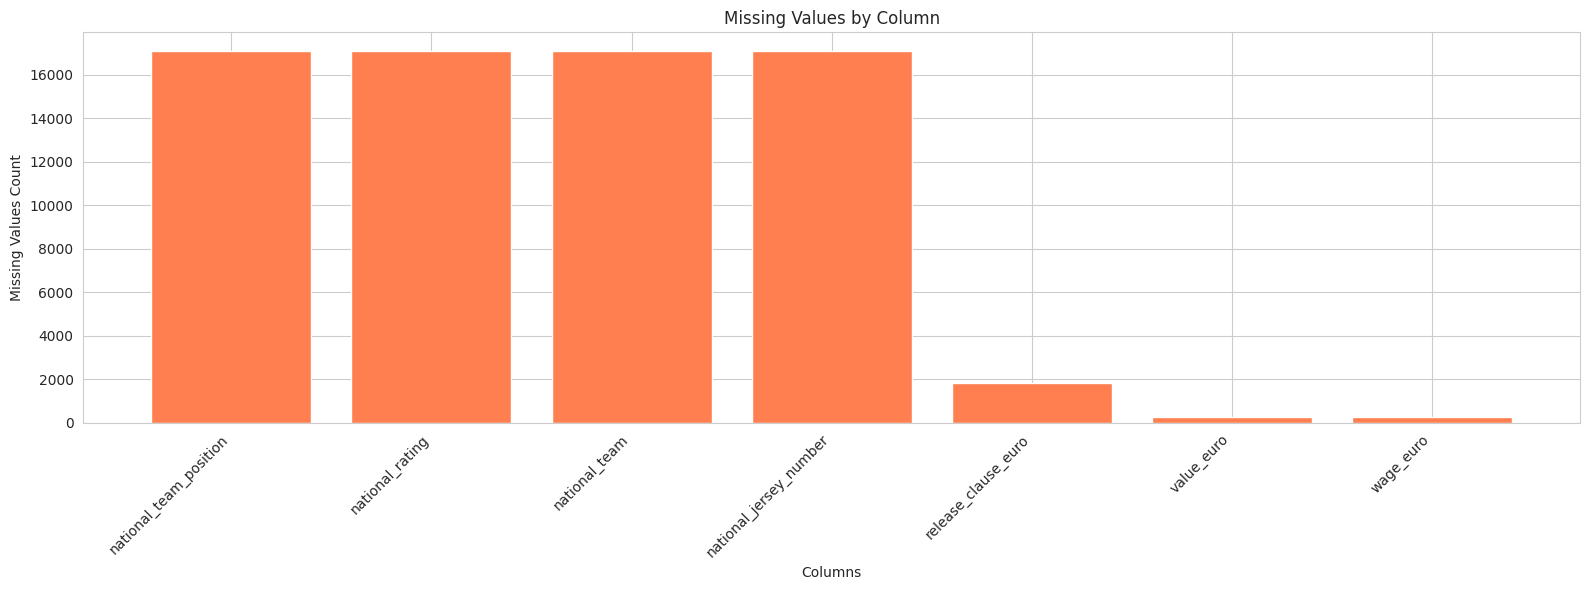


--- Duplicate Rows ---
Number of duplicate rows: 0


In [5]:
# 2.2: DATA QUALITY ASSESSMENT
# ============================================================================
print("\n" + "="*80)
print("DATA QUALITY ASSESSMENT")
print("="*80)

# Check for missing values
print("\n--- Missing Values Count ---")
missing_values = df.isnull().sum()
missing_percentage = (missing_values / len(df)) * 100
missing_df = pd.DataFrame({
    'Missing_Count': missing_values,
    'Percentage': missing_percentage
})
print(missing_df[missing_df['Missing_Count'] > 0].sort_values('Missing_Count', ascending=False))

# Visualize missing values
plt.figure(figsize=(16, 6))
missing_data = df.isnull().sum()
missing_data = missing_data[missing_data > 0].sort_values(ascending=False)
if len(missing_data) > 0:
    plt.bar(range(len(missing_data)), missing_data.values, color='coral')
    plt.xticks(range(len(missing_data)), missing_data.index, rotation=45, ha='right')
    plt.xlabel('Columns')
    plt.ylabel('Missing Values Count')
    plt.title('Missing Values by Column')
    plt.tight_layout()
    plt.show()
else:
    print("✓ No missing values found in the dataset!")

# Check for duplicate rows
print(f"\n--- Duplicate Rows ---")
duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")
if duplicates > 0:
    print("\nDuplicate rows preview:")
    print(df[df.duplicated(keep=False)].head())


UNIVARIATE ANALYSIS - UNDERSTANDING EACH FEATURE

--- PLAYER DEMOGRAPHICS ---

Age Statistics:
  Average age: 25.6 years
  Median age: 25.0 years
  Youngest player: 17 years
  Oldest player: 46 years

Height Statistics:
  Average height: 174.9 cm
  Shortest player: 152.4 cm
  Tallest player: 205.7 cm

Weight Statistics:
  Average weight: 75.3 kg
  Lightest player: 49.9 kg
  Heaviest player: 110.2 kg

Overall Rating Statistics:
  Average rating: 66.2
  Median rating: 66.0
  Lowest rating: 47
  Highest rating: 94

Potential Statistics:
  Average potential: 71.4
  Highest potential: 95

--- Top 10 Nationalities ---
nationality
England        1658
Germany        1199
Spain          1070
France          925
Argentina       904
Brazil          832
Italy           655
Colombia        624
Japan           466
Netherlands     441
Name: count, dtype: int64

--- Top 10 Positions ---
positions
CB        2243
GK        2065
ST        1747
CM         764
CDM,CM     709
LB         672
CM,CDM     632


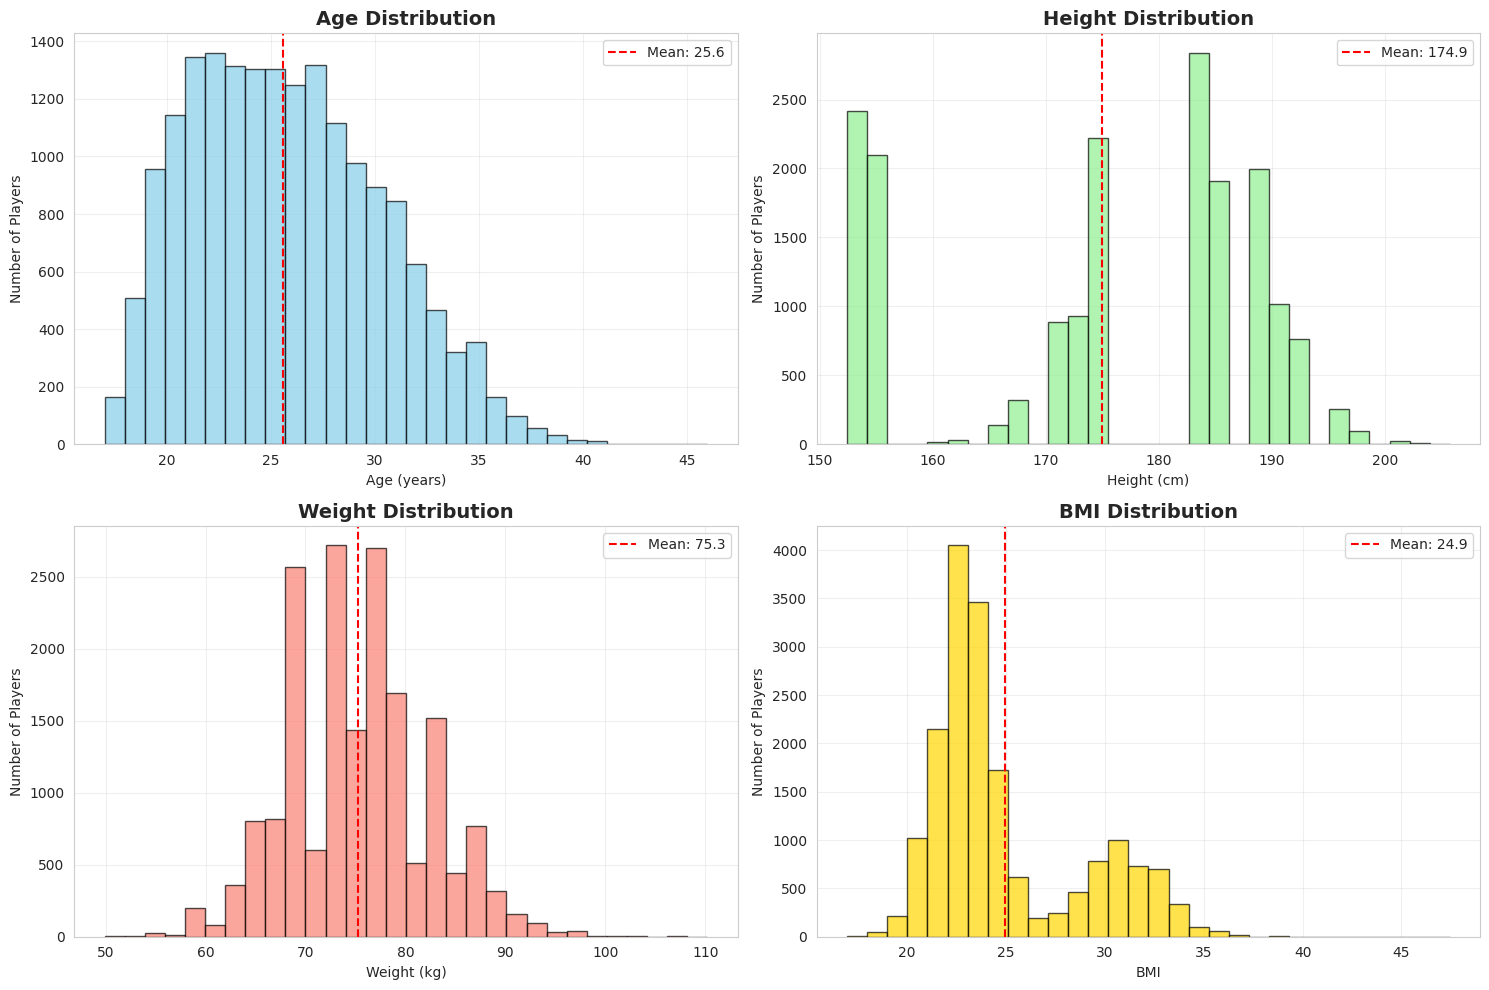

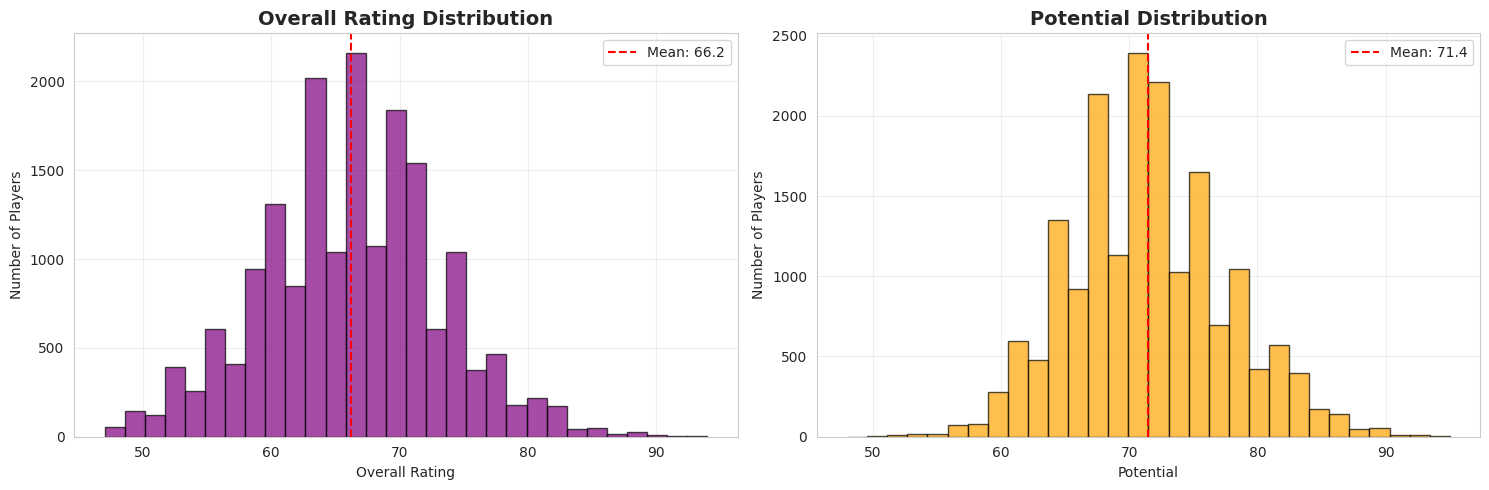

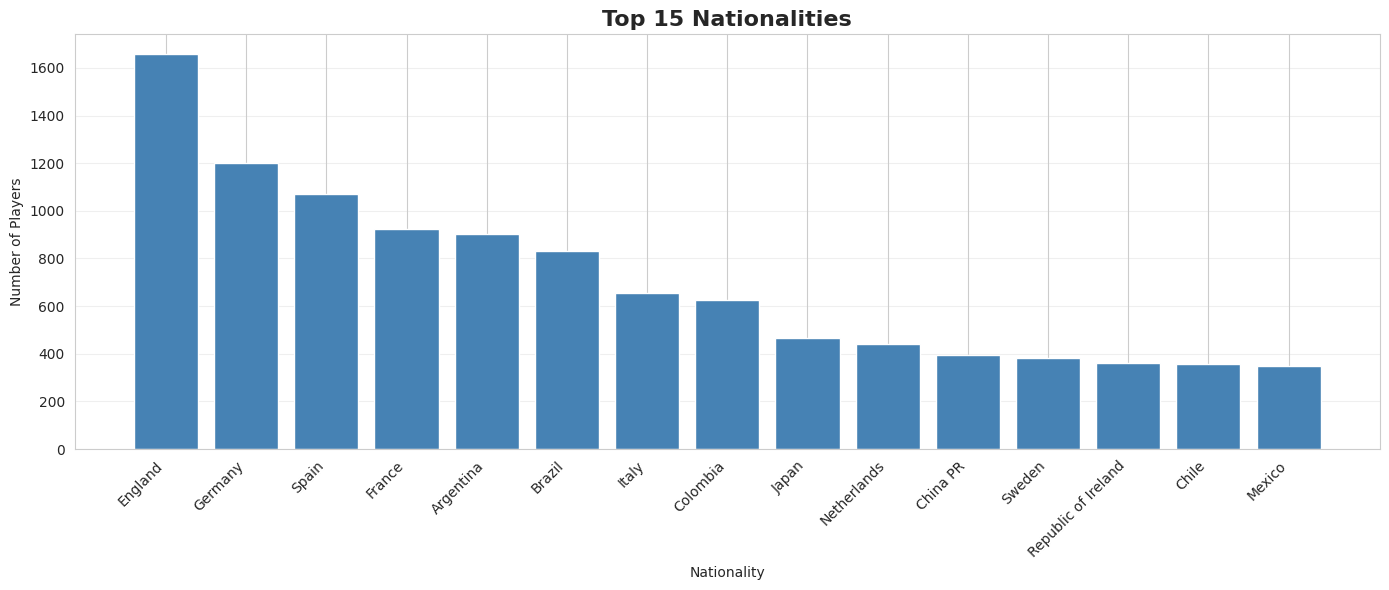

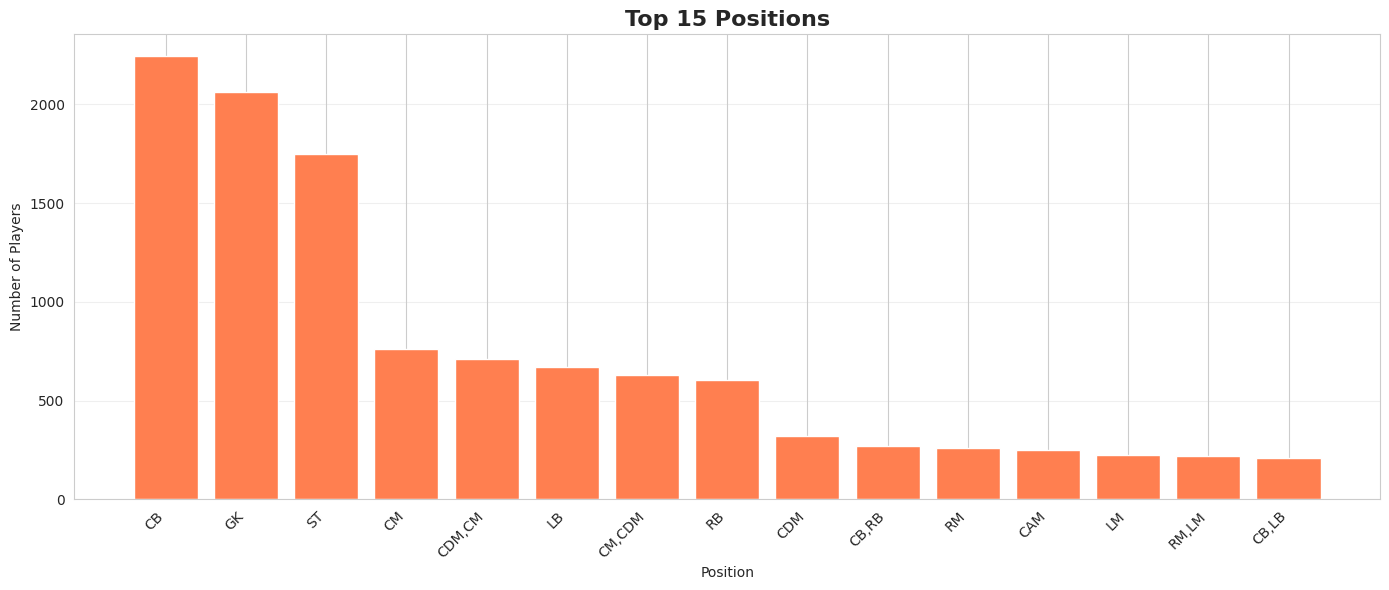


--- Analyzing Skill Attributes ---


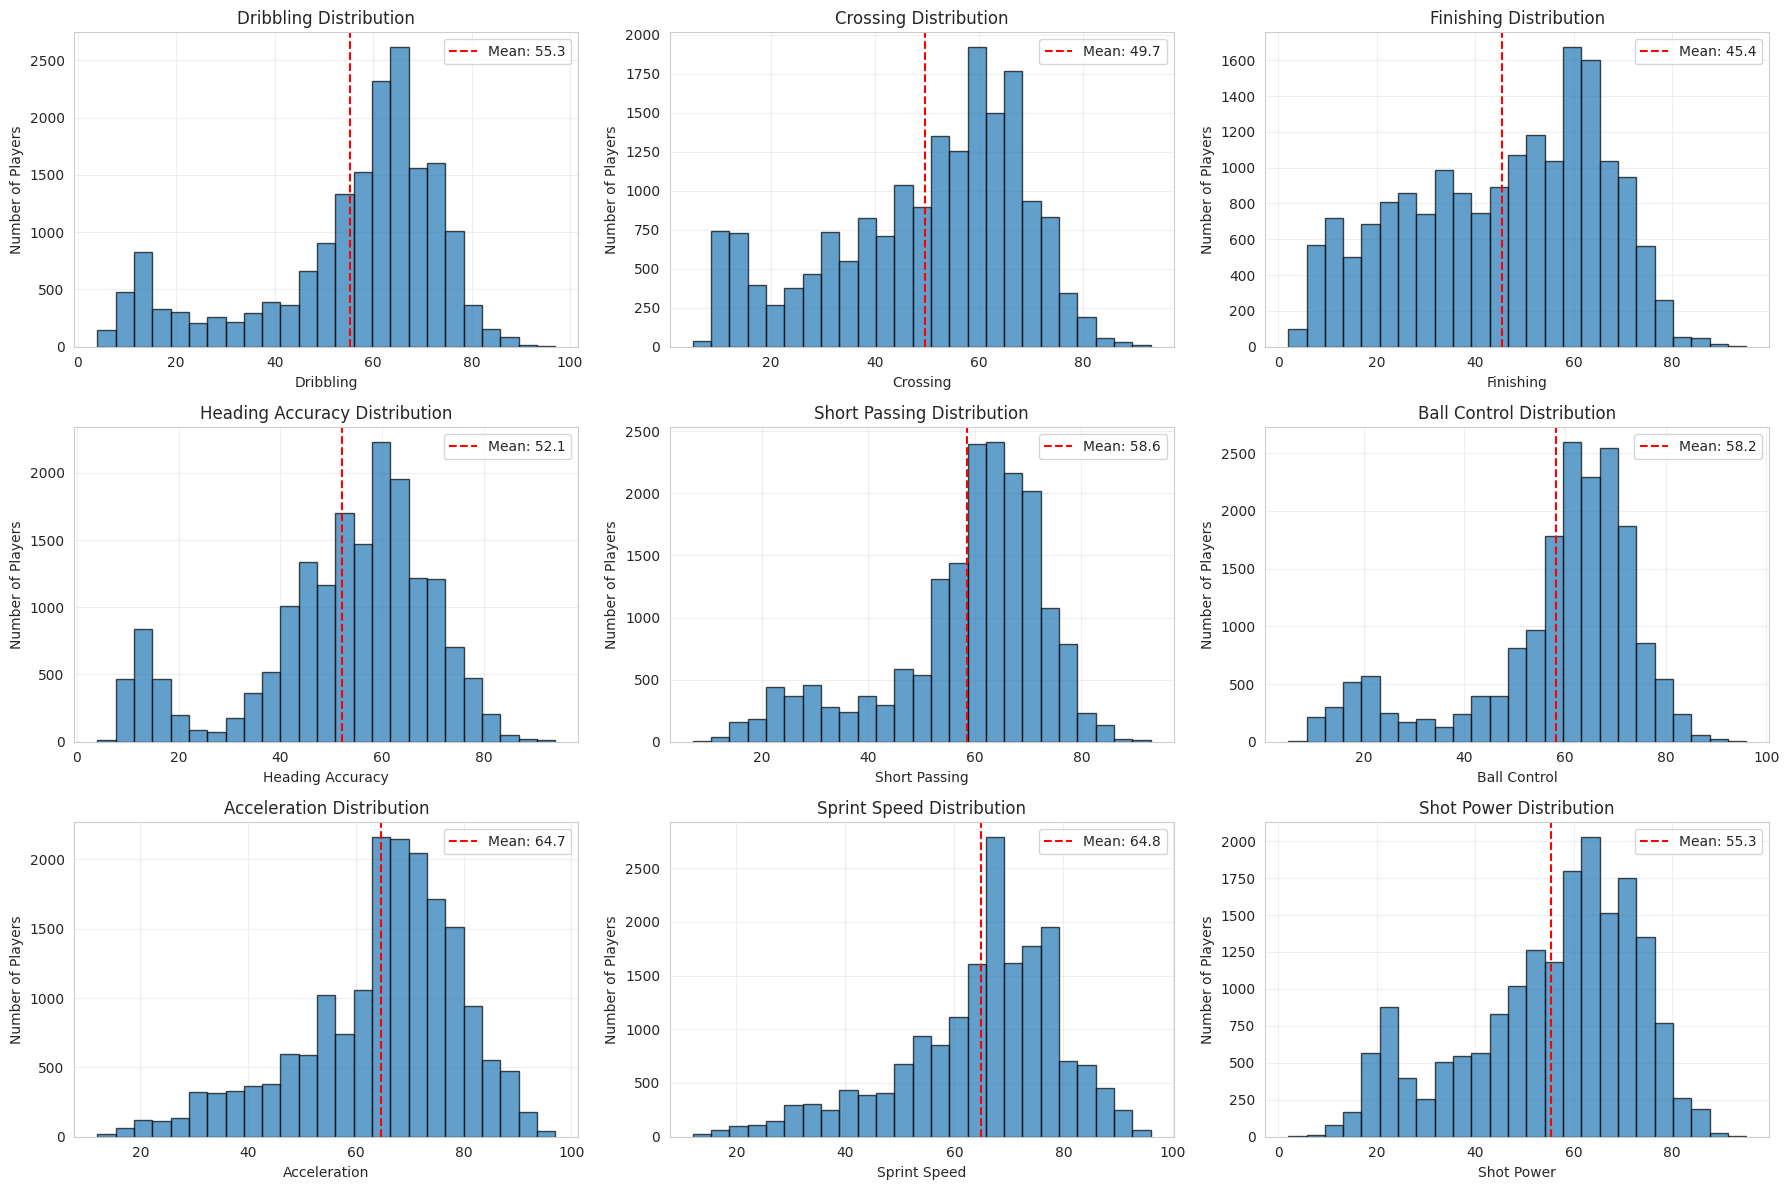

In [6]:
# 2.3: UNIVARIATE ANALYSIS (Single Variable Analysis)
# ============================================================================
print("\n" + "="*80)
print("UNIVARIATE ANALYSIS - UNDERSTANDING EACH FEATURE")
print("="*80)

# Key player demographics
print("\n--- PLAYER DEMOGRAPHICS ---")

# Age analysis
if 'age' in df.columns:
    print(f"\nAge Statistics:")
    print(f"  Average age: {df['age'].mean():.1f} years")
    print(f"  Median age: {df['age'].median():.1f} years")
    print(f"  Youngest player: {df['age'].min()} years")
    print(f"  Oldest player: {df['age'].max()} years")

# Height analysis
if 'height_cm' in df.columns:
    print(f"\nHeight Statistics:")
    print(f"  Average height: {df['height_cm'].mean():.1f} cm")
    print(f"  Shortest player: {df['height_cm'].min():.1f} cm")
    print(f"  Tallest player: {df['height_cm'].max():.1f} cm")

# Weight analysis
if 'weight_kgs' in df.columns:
    print(f"\nWeight Statistics:")
    print(f"  Average weight: {df['weight_kgs'].mean():.1f} kg")
    print(f"  Lightest player: {df['weight_kgs'].min():.1f} kg")
    print(f"  Heaviest player: {df['weight_kgs'].max():.1f} kg")

# Rating analysis
if 'overall_rating' in df.columns:
    print(f"\nOverall Rating Statistics:")
    print(f"  Average rating: {df['overall_rating'].mean():.1f}")
    print(f"  Median rating: {df['overall_rating'].median():.1f}")
    print(f"  Lowest rating: {df['overall_rating'].min()}")
    print(f"  Highest rating: {df['overall_rating'].max()}")

# Potential analysis
if 'potential' in df.columns:
    print(f"\nPotential Statistics:")
    print(f"  Average potential: {df['potential'].mean():.1f}")
    print(f"  Highest potential: {df['potential'].max()}")

# Nationality distribution
if 'nationality' in df.columns:
    print(f"\n--- Top 10 Nationalities ---")
    print(df['nationality'].value_counts().head(10))

# Position distribution
if 'positions' in df.columns:
    print(f"\n--- Top 10 Positions ---")
    print(df['positions'].value_counts().head(10))

# Preferred foot
if 'preferred_foot' in df.columns:
    print(f"\n--- Preferred Foot Distribution ---")
    print(df['preferred_foot'].value_counts())


# Visualizations for key features
print("\n--- Creating Distribution Plots ---")

# Plot 1: Age, Height, Weight, BMI distributions
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

if 'age' in df.columns:
    axes[0, 0].hist(df['age'].dropna(), bins=30, edgecolor='black', alpha=0.7, color='skyblue')
    axes[0, 0].set_title('Age Distribution', fontsize=14, fontweight='bold')
    axes[0, 0].set_xlabel('Age (years)')
    axes[0, 0].set_ylabel('Number of Players')
    axes[0, 0].axvline(df['age'].mean(), color='red', linestyle='--', label=f'Mean: {df["age"].mean():.1f}')
    axes[0, 0].legend()
    axes[0, 0].grid(True, alpha=0.3)

if 'height_cm' in df.columns:
    axes[0, 1].hist(df['height_cm'].dropna(), bins=30, edgecolor='black', alpha=0.7, color='lightgreen')
    axes[0, 1].set_title('Height Distribution', fontsize=14, fontweight='bold')
    axes[0, 1].set_xlabel('Height (cm)')
    axes[0, 1].set_ylabel('Number of Players')
    axes[0, 1].axvline(df['height_cm'].mean(), color='red', linestyle='--', label=f'Mean: {df["height_cm"].mean():.1f}')
    axes[0, 1].legend()
    axes[0, 1].grid(True, alpha=0.3)

if 'weight_kgs' in df.columns:
    axes[1, 0].hist(df['weight_kgs'].dropna(), bins=30, edgecolor='black', alpha=0.7, color='salmon')
    axes[1, 0].set_title('Weight Distribution', fontsize=14, fontweight='bold')
    axes[1, 0].set_xlabel('Weight (kg)')
    axes[1, 0].set_ylabel('Number of Players')
    axes[1, 0].axvline(df['weight_kgs'].mean(), color='red', linestyle='--', label=f'Mean: {df["weight_kgs"].mean():.1f}')
    axes[1, 0].legend()
    axes[1, 0].grid(True, alpha=0.3)

# Calculate and plot BMI
if 'height_cm' in df.columns and 'weight_kgs' in df.columns:
    bmi = df['weight_kgs'] / ((df['height_cm']/100) ** 2)
    axes[1, 1].hist(bmi.dropna(), bins=30, edgecolor='black', alpha=0.7, color='gold')
    axes[1, 1].set_title('BMI Distribution', fontsize=14, fontweight='bold')
    axes[1, 1].set_xlabel('BMI')
    axes[1, 1].set_ylabel('Number of Players')
    axes[1, 1].axvline(bmi.mean(), color='red', linestyle='--', label=f'Mean: {bmi.mean():.1f}')
    axes[1, 1].legend()
    axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Plot 2: Rating and Potential distributions
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

if 'overall_rating' in df.columns:
    axes[0].hist(df['overall_rating'].dropna(), bins=30, edgecolor='black', alpha=0.7, color='purple')
    axes[0].set_title('Overall Rating Distribution', fontsize=14, fontweight='bold')
    axes[0].set_xlabel('Overall Rating')
    axes[0].set_ylabel('Number of Players')
    axes[0].axvline(df['overall_rating'].mean(), color='red', linestyle='--', label=f'Mean: {df["overall_rating"].mean():.1f}')
    axes[0].legend()
    axes[0].grid(True, alpha=0.3)

if 'potential' in df.columns:
    axes[1].hist(df['potential'].dropna(), bins=30, edgecolor='black', alpha=0.7, color='orange')
    axes[1].set_title('Potential Distribution', fontsize=14, fontweight='bold')
    axes[1].set_xlabel('Potential')
    axes[1].set_ylabel('Number of Players')
    axes[1].axvline(df['potential'].mean(), color='red', linestyle='--', label=f'Mean: {df["potential"].mean():.1f}')
    axes[1].legend()
    axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Plot 3: Top nationalities
if 'nationality' in df.columns:
    plt.figure(figsize=(14, 6))
    top_nationalities = df['nationality'].value_counts().head(15)
    plt.bar(range(len(top_nationalities)), top_nationalities.values, color='steelblue')
    plt.xticks(range(len(top_nationalities)), top_nationalities.index, rotation=45, ha='right')
    plt.title('Top 15 Nationalities', fontsize=16, fontweight='bold')
    plt.xlabel('Nationality')
    plt.ylabel('Number of Players')
    plt.grid(True, alpha=0.3, axis='y')
    plt.tight_layout()
    plt.show()

# Plot 4: Top positions
if 'positions' in df.columns:
    plt.figure(figsize=(14, 6))
    top_positions = df['positions'].value_counts().head(15)
    plt.bar(range(len(top_positions)), top_positions.values, color='coral')
    plt.xticks(range(len(top_positions)), top_positions.index, rotation=45, ha='right')
    plt.title('Top 15 Positions', fontsize=16, fontweight='bold')
    plt.xlabel('Position')
    plt.ylabel('Number of Players')
    plt.grid(True, alpha=0.3, axis='y')
    plt.tight_layout()
    plt.show()

# Plot 5: Skill attributes analysis
print("\n--- Analyzing Skill Attributes ---")
skill_columns = ['pace', 'shooting', 'passing', 'dribbling', 'defending', 'physical',
                 'crossing', 'finishing', 'heading_accuracy', 'short_passing',
                 'ball_control', 'acceleration', 'sprint_speed', 'shot_power',
                 'stamina', 'strength', 'positioning', 'vision']

# Filter only existing skill columns
existing_skills = [col for col in skill_columns if col in df.columns]

if existing_skills:
    fig, axes = plt.subplots(3, 3, figsize=(18, 12))
    axes = axes.ravel()

    for idx, skill in enumerate(existing_skills[:9]):
        axes[idx].hist(df[skill].dropna(), bins=25, edgecolor='black', alpha=0.7)
        axes[idx].set_title(f'{skill.replace("_", " ").title()} Distribution')
        axes[idx].set_xlabel(skill.replace("_", " ").title())
        axes[idx].set_ylabel('Number of Players')
        axes[idx].axvline(df[skill].mean(), color='red', linestyle='--',
                         label=f'Mean: {df[skill].mean():.1f}')
        axes[idx].legend()
        axes[idx].grid(True, alpha=0.3)

    plt.tight_layout()
    plt.show()



BIVARIATE ANALYSIS - RELATIONSHIPS BETWEEN FEATURES

--- Analyzing Key Relationships ---


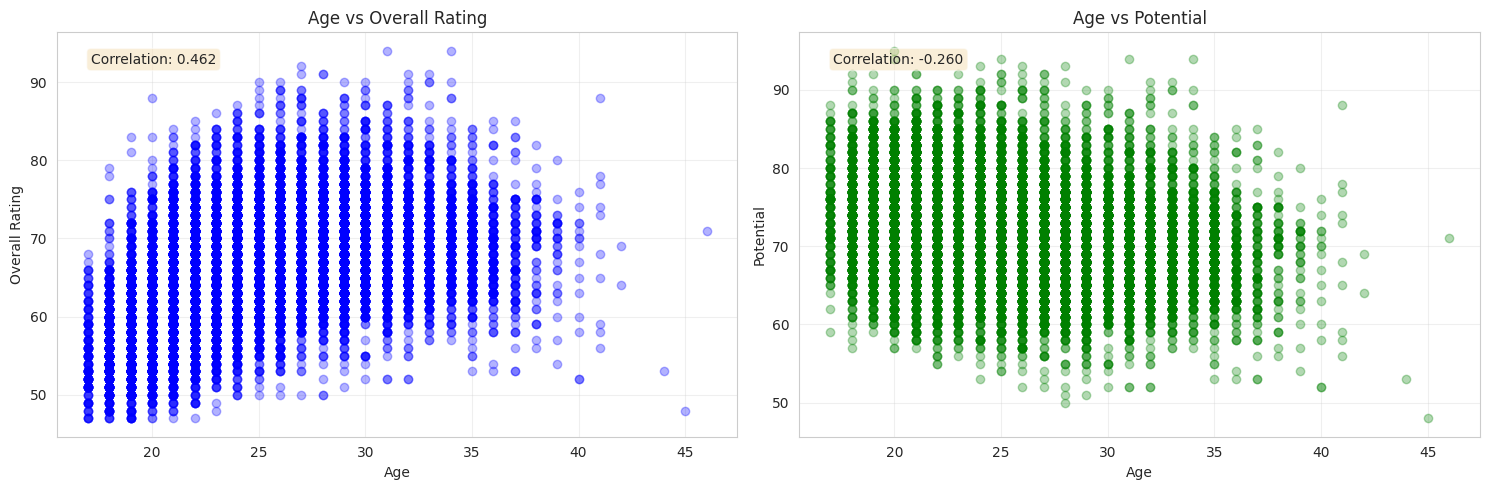

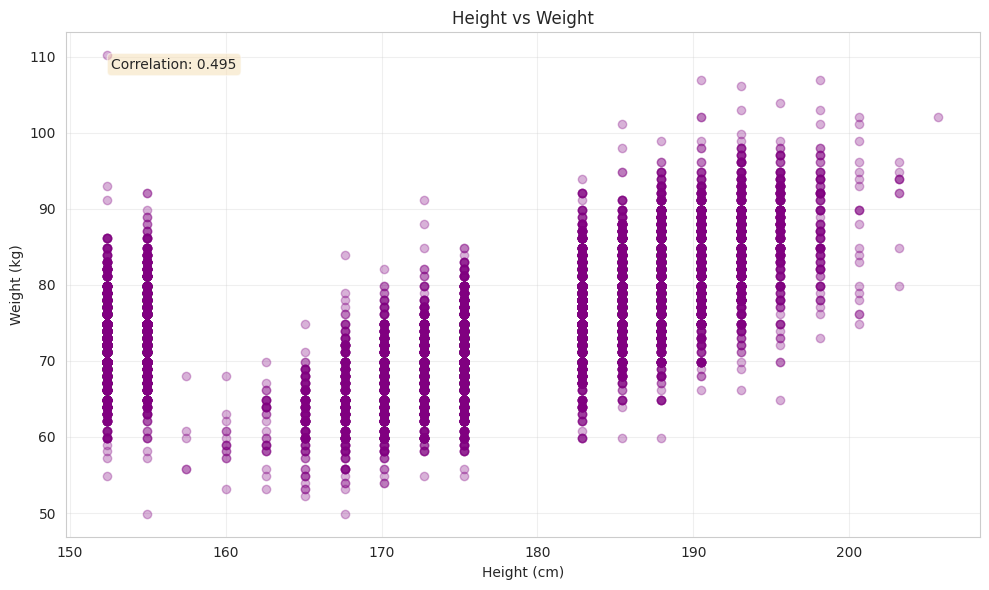

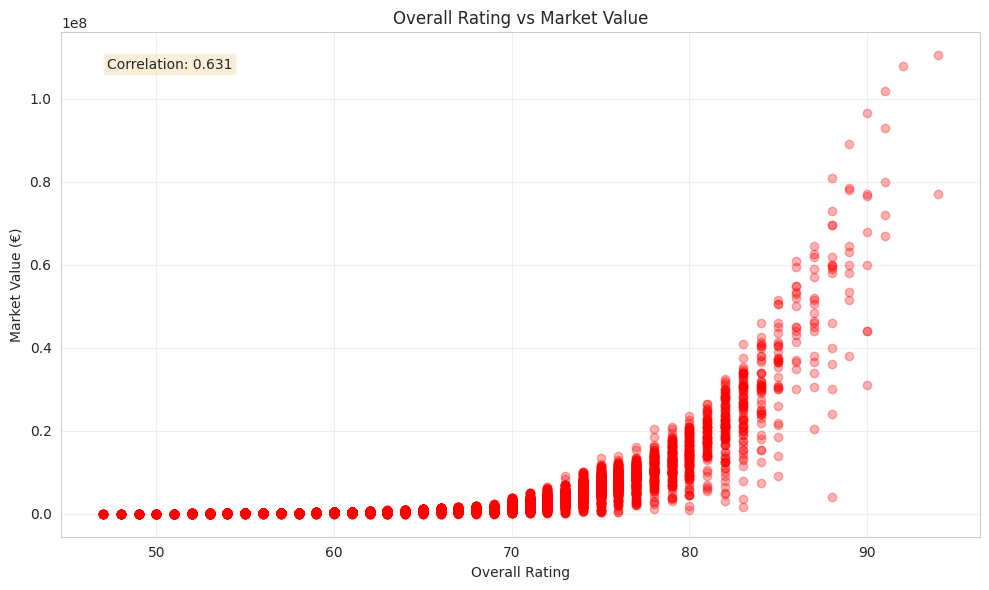


--- Correlation Analysis for Key Features ---
                     age  height_cm  weight_kgs  overall_rating  potential  \
age             1.000000   0.059579    0.233819        0.461529  -0.259579   
height_cm       0.059579   1.000000    0.495320        0.038080   0.008526   
weight_kgs      0.233819   0.495320    1.000000        0.150521  -0.015099   
overall_rating  0.461529   0.038080    0.150521        1.000000   0.647249   
potential      -0.259579   0.008526   -0.015099        0.647249   1.000000   
value_euro      0.082360   0.011144    0.044519        0.630928   0.576341   
wage_euro       0.152456   0.021270    0.062045        0.577316   0.484029   

                value_euro  wage_euro  
age               0.082360   0.152456  
height_cm         0.011144   0.021270  
weight_kgs        0.044519   0.062045  
overall_rating    0.630928   0.577316  
potential         0.576341   0.484029  
value_euro        1.000000   0.856466  
wage_euro         0.856466   1.000000  


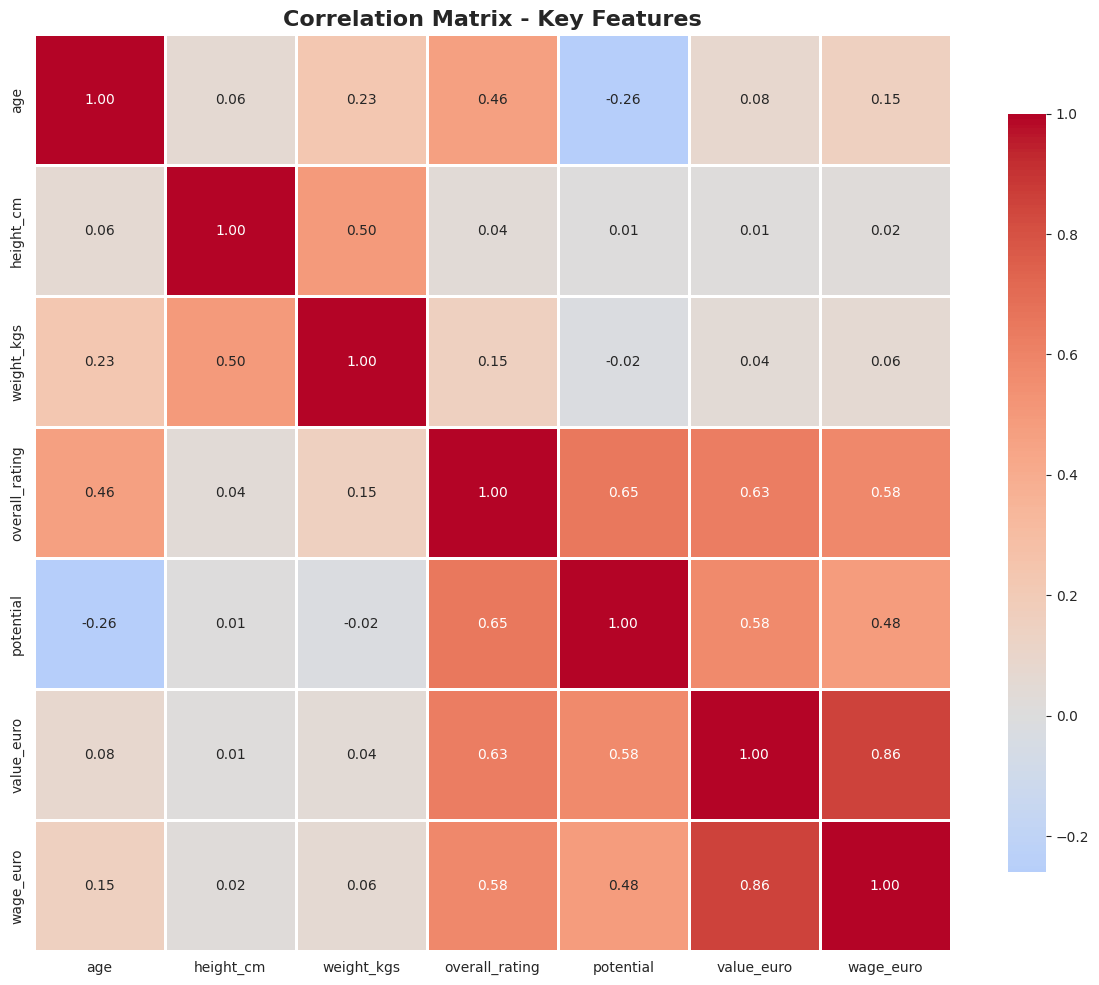

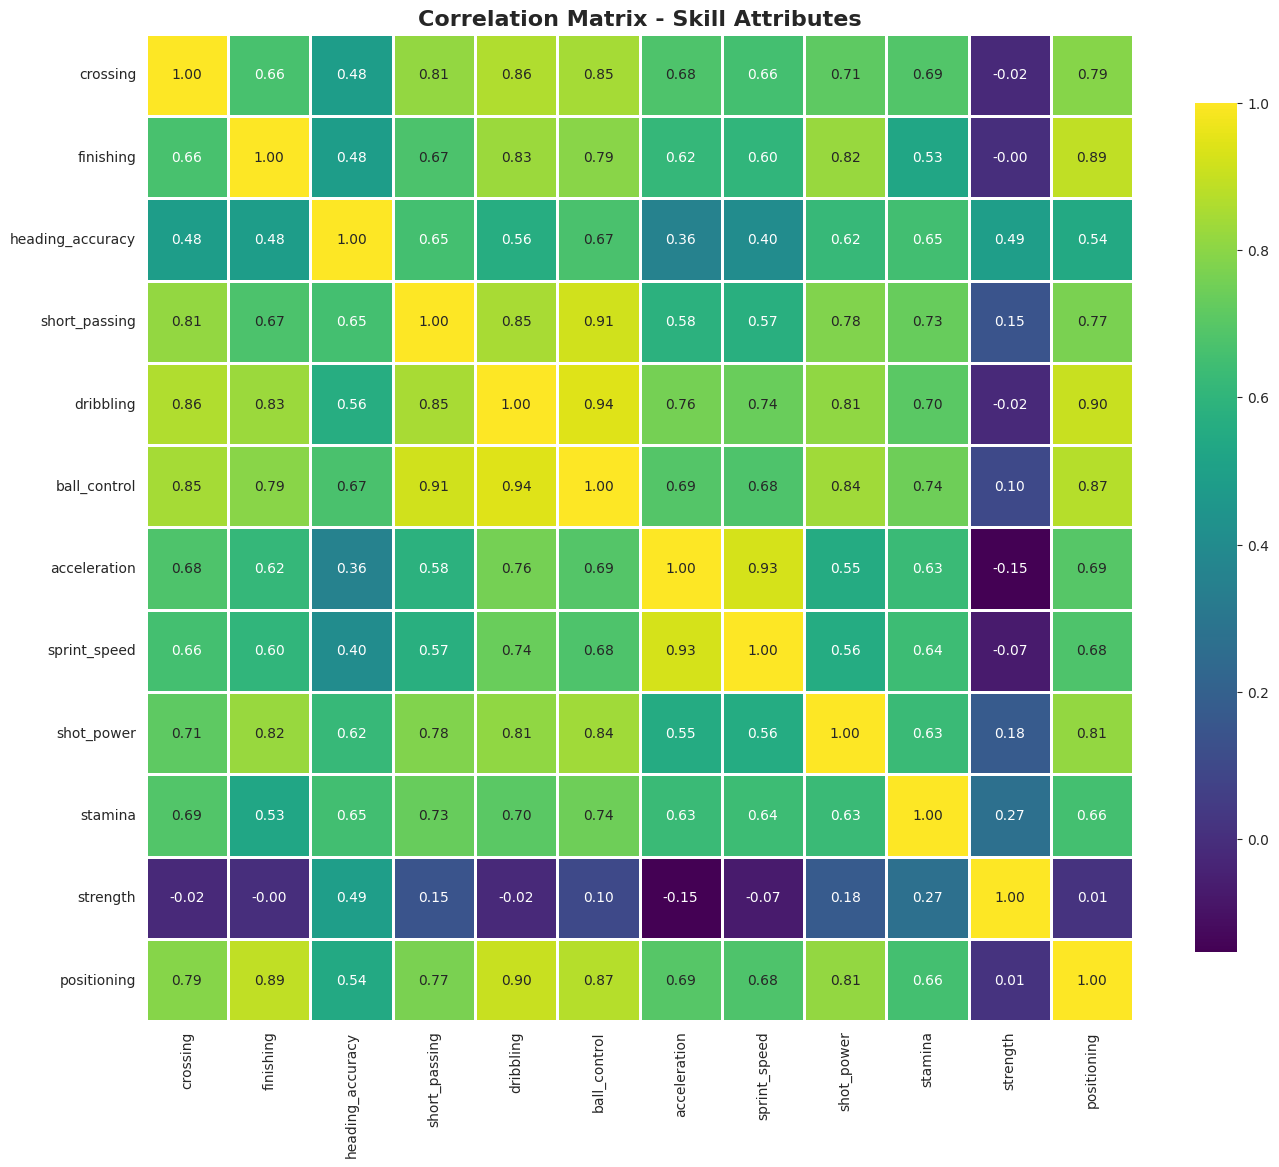

In [7]:
# 2.4: BIVARIATE ANALYSIS (Two Variable Relationships)
# ============================================================================
print("\n" + "="*80)
print("BIVARIATE ANALYSIS - RELATIONSHIPS BETWEEN FEATURES")
print("="*80)

# Key relationships to explore
print("\n--- Analyzing Key Relationships ---")

# 1. Age vs Rating
if 'age' in df.columns and 'overall_rating' in df.columns:
    fig, axes = plt.subplots(1, 2, figsize=(15, 5))

    axes[0].scatter(df['age'], df['overall_rating'], alpha=0.3, color='blue')
    axes[0].set_xlabel('Age')
    axes[0].set_ylabel('Overall Rating')
    axes[0].set_title('Age vs Overall Rating')
    axes[0].grid(True, alpha=0.3)

    # Calculate correlation
    correlation = df['age'].corr(df['overall_rating'])
    axes[0].text(0.05, 0.95, f'Correlation: {correlation:.3f}',
                transform=axes[0].transAxes, verticalalignment='top',
                bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

# 2. Age vs Potential
if 'age' in df.columns and 'potential' in df.columns:
    axes[1].scatter(df['age'], df['potential'], alpha=0.3, color='green')
    axes[1].set_xlabel('Age')
    axes[1].set_ylabel('Potential')
    axes[1].set_title('Age vs Potential')
    axes[1].grid(True, alpha=0.3)

    correlation = df['age'].corr(df['potential'])
    axes[1].text(0.05, 0.95, f'Correlation: {correlation:.3f}',
                transform=axes[1].transAxes, verticalalignment='top',
                bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

    plt.tight_layout()
    plt.show()

# 3. Height vs Weight
if 'height_cm' in df.columns and 'weight_kgs' in df.columns:
    plt.figure(figsize=(10, 6))
    plt.scatter(df['height_cm'], df['weight_kgs'], alpha=0.3, color='purple')
    plt.xlabel('Height (cm)')
    plt.ylabel('Weight (kg)')
    plt.title('Height vs Weight')
    plt.grid(True, alpha=0.3)

    correlation = df['height_cm'].corr(df['weight_kgs'])
    plt.text(0.05, 0.95, f'Correlation: {correlation:.3f}',
            transform=plt.gca().transAxes, verticalalignment='top',
            bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))
    plt.tight_layout()
    plt.show()

# 4. Value vs Rating
if 'value_euro' in df.columns and 'overall_rating' in df.columns:
    plt.figure(figsize=(10, 6))
    plt.scatter(df['overall_rating'], df['value_euro'], alpha=0.3, color='red')
    plt.xlabel('Overall Rating')
    plt.ylabel('Market Value (€)')
    plt.title('Overall Rating vs Market Value')
    plt.grid(True, alpha=0.3)

    correlation = df['overall_rating'].corr(df['value_euro'])
    plt.text(0.05, 0.95, f'Correlation: {correlation:.3f}',
            transform=plt.gca().transAxes, verticalalignment='top',
            bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))
    plt.tight_layout()
    plt.show()

# Correlation matrix for numerical features
print("\n--- Correlation Analysis for Key Features ---")
key_features = ['age', 'height_cm', 'weight_kgs', 'overall_rating', 'potential',
                'value_euro', 'wage_euro', 'international_reputation']
key_features = [col for col in key_features if col in df.columns]

if len(key_features) > 1:
    correlation_matrix = df[key_features].corr()
    print(correlation_matrix)

    # Heatmap of correlations
    plt.figure(figsize=(12, 10))
    sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm',
                center=0, square=True, linewidths=1, cbar_kws={"shrink": 0.8})
    plt.title('Correlation Matrix - Key Features', fontsize=16, fontweight='bold')
    plt.tight_layout()
    plt.show()

# Correlation for skill attributes
skill_cols = ['crossing', 'finishing', 'heading_accuracy', 'short_passing',
              'dribbling', 'ball_control', 'acceleration', 'sprint_speed',
              'shot_power', 'stamina', 'strength', 'positioning']
skill_cols = [col for col in skill_cols if col in df.columns]

if len(skill_cols) > 1:
    plt.figure(figsize=(14, 12))
    correlation_skills = df[skill_cols].corr()
    sns.heatmap(correlation_skills, annot=True, fmt='.2f', cmap='viridis',
                square=True, linewidths=1, cbar_kws={"shrink": 0.8})
    plt.title('Correlation Matrix - Skill Attributes', fontsize=16, fontweight='bold')
    plt.tight_layout()
    plt.show()


OUTLIER DETECTION

--- Outlier Summary for Key Features ---

age:
  Number of outliers: 30
  Percentage: 0.17%
  Acceptable range: 11.50 to 39.50
  Outlier values range: 40.00 to 46.00

height_cm:
  Number of outliers: 0
  Percentage: 0.00%
  Acceptable range: 109.22 to 231.14

weight_kgs:
  Number of outliers: 117
  Percentage: 0.65%
  Acceptable range: 55.05 to 94.65
  Outlier values range: 49.90 to 110.20

overall_rating:
  Number of outliers: 162
  Percentage: 0.90%
  Acceptable range: 48.50 to 84.50
  Outlier values range: 47.00 to 94.00

value_euro:
  Number of outliers: 2419
  Percentage: 13.47%
  Acceptable range: -2337500.00 to 4762500.00
  Outlier values range: 4800000.00 to 110500000.00

wage_euro:
  Number of outliers: 2001
  Percentage: 11.15%
  Acceptable range: -11000.00 to 21000.00
  Outlier values range: 22000.00 to 565000.00


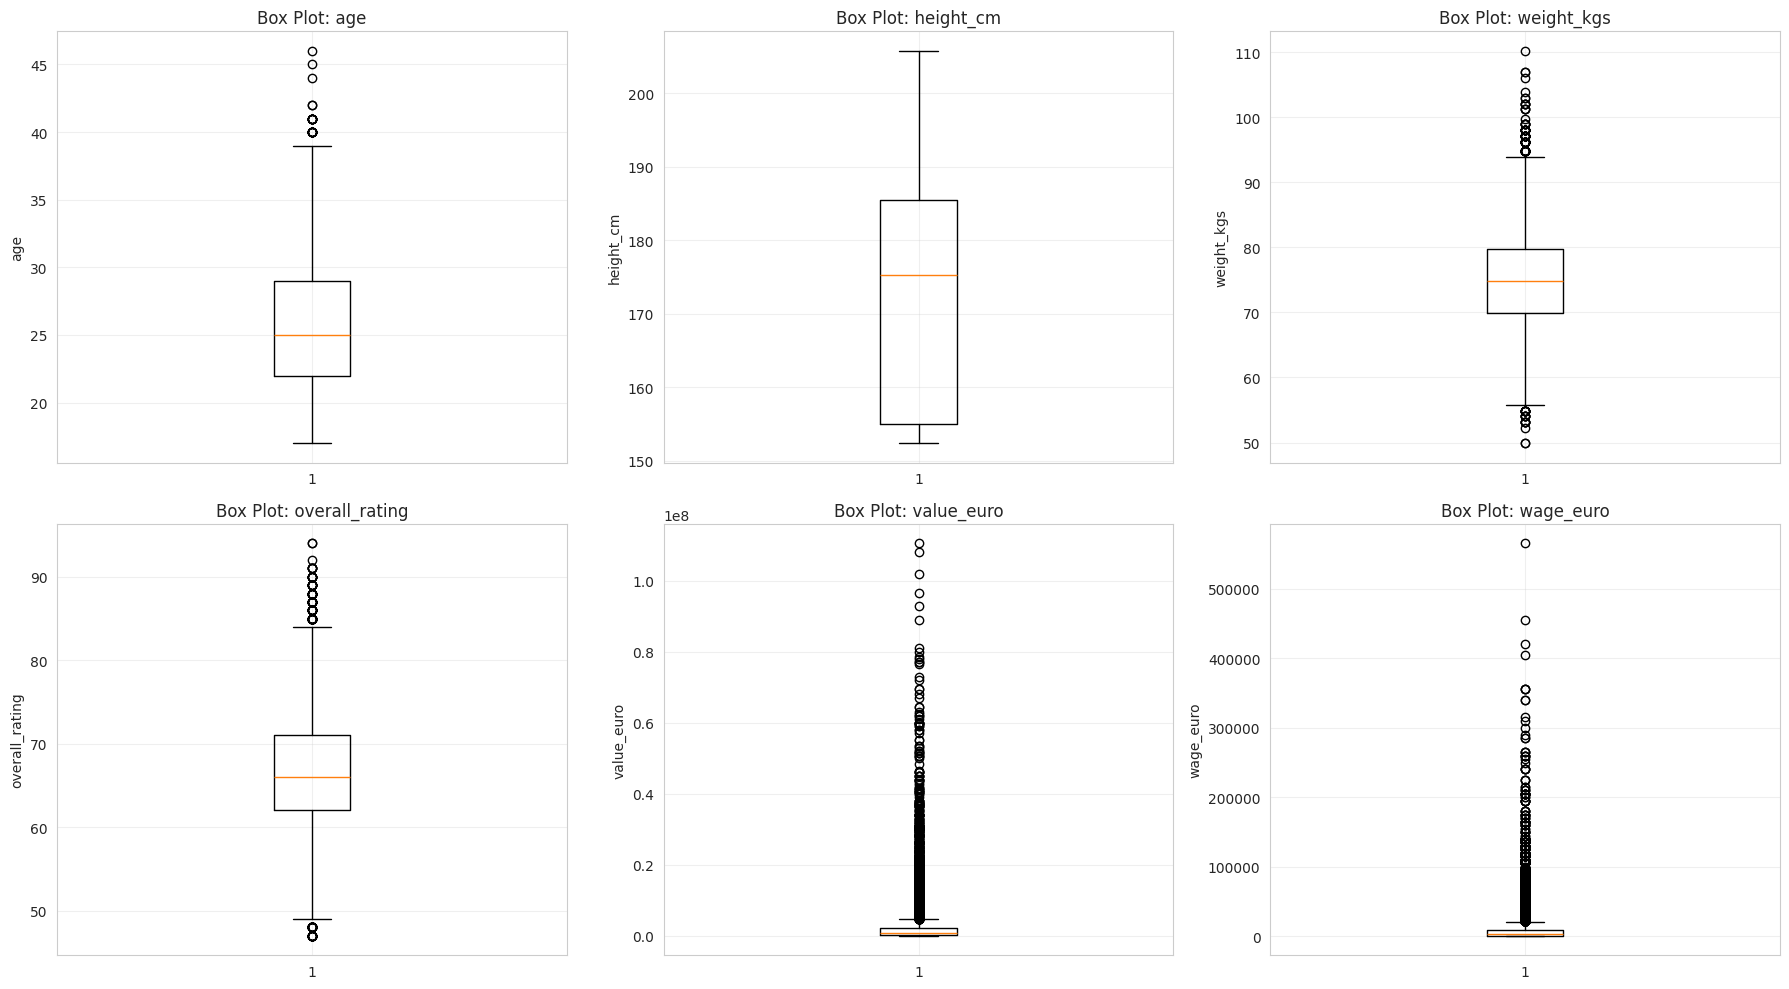

In [8]:
# 2.5: OUTLIER DETECTION
# ============================================================================
print("\n" + "="*80)
print("OUTLIER DETECTION")
print("="*80)

def detect_outliers_iqr(data, column):
    """
    Detect outliers using the Interquartile Range (IQR) method
    Outliers are extreme values that differ significantly from other observations
    """
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers, lower_bound, upper_bound

print("\n--- Outlier Summary for Key Features ---")
outlier_columns = ['age', 'height_cm', 'weight_kgs', 'overall_rating',
                   'value_euro', 'wage_euro']
outlier_columns = [col for col in outlier_columns if col in df.columns]

for col in outlier_columns:
    outliers, lower, upper = detect_outliers_iqr(df, col)
    print(f"\n{col}:")
    print(f"  Number of outliers: {len(outliers)}")
    print(f"  Percentage: {(len(outliers)/len(df))*100:.2f}%")
    print(f"  Acceptable range: {lower:.2f} to {upper:.2f}")
    if len(outliers) > 0:
        print(f"  Outlier values range: {outliers[col].min():.2f} to {outliers[col].max():.2f}")

# Box plots for outlier visualization
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.ravel()

for idx, col in enumerate(outlier_columns[:6]):
    axes[idx].boxplot(df[col].dropna())
    axes[idx].set_title(f'Box Plot: {col}')
    axes[idx].set_ylabel(col)
    axes[idx].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [15]:
# ============================================================================
# SECTION 3: DATA CLEANING
# ============================================================================
print("\n" + "="*80)
print("DATA CLEANING")
print("="*80)

df_clean = df.copy()
print(f"Starting with {len(df_clean)} players")

# 3.1: Handle Missing Values
print("\n--- Handling Missing Values ---")

print("\n--- Creating Composite Skill Features ---")

df_engineered = df_clean.copy()

attacking_skills = ['crossing', 'finishing', 'heading_accuracy', 'short_passing',
                   'volleys', 'dribbling', 'curve', 'freekick_accuracy', 'long_passing']
attacking_skills = [col for col in attacking_skills if col in df_engineered.columns]
if len(attacking_skills) > 0:
    df_engineered['attacking_score'] = df_engineered[attacking_skills].mean(axis=1)
    print(f"✓ Created: Attacking Score (average of {len(attacking_skills)} attributes)")

# Defensive skills
defensive_skills = ['marking', 'standing_tackle', 'sliding_tackle', 'interceptions']
defensive_skills = [col for col in defensive_skills if col in df_engineered.columns]
if len(defensive_skills) > 0:
    df_engineered['defensive_score'] = df_engineered[defensive_skills].mean(axis=1)

# Physical skills
physical_skills = ['acceleration', 'sprint_speed', 'agility', 'balance',
                  'jumping', 'stamina', 'strength']
physical_skills = [col for col in physical_skills if col in df_engineered.columns]
if len(physical_skills) > 0:
    df_engineered['physical_score'] = df_engineered[physical_skills].mean(axis=1)
    print(f"✓ Created: Physical Score (average of {len(physical_skills)} attributes)")

# Mental/Technical skills
mental_skills = ['vision', 'composure', 'reactions', 'positioning', 'ball_control']
mental_skills = [col for col in mental_skills if col in df_engineered.columns]
if len(mental_skills) > 0:
    df_engineered['mental_score'] = df_engineered[mental_skills].mean(axis=1)
    print(f"✓ Created: Mental Score (average of {len(mental_skills)} attributes)")


# Strategy 1: Drop columns with >50% missing values
threshold = 0.5
missing_ratio = df_clean.isnull().sum() / len(df_clean)
cols_to_drop = missing_ratio[missing_ratio > threshold].index.tolist()
if cols_to_drop:
    print(f"Dropping columns with >{threshold*100}% missing: {cols_to_drop}")
    df_clean = df_clean.drop(columns=cols_to_drop)

# Strategy 2: Fill numerical missing values with median
numerical_cols = df_clean.select_dtypes(include=['int64', 'float64']).columns
for col in numerical_cols:
    if df_clean[col].isnull().sum() > 0:
        median_value = df_clean[col].median()
        df_clean[col].fillna(median_value, inplace=True)
        print(f"✓ Created: Defensive Score (average of {len(defensive_skills)} attributes)")
# Strategy 3: Fill categorical missing values with mode or 'Unknown'
categorical_cols = df_clean.select_dtypes(include=['object']).columns
for col in categorical_cols:
    if df_clean[col].isnull().sum() > 0:
        mode_value = df_clean[col].mode()[0] if not df_clean[col].mode().empty else 'Unknown'
        df_clean[col].fillna(mode_value, inplace=True)
        print(f"✓ Filled {col} missing values with: {mode_value}")

print(f"\n✓ Missing values after cleaning: {df_clean.isnull().sum().sum()}")

# 3.2: Remove Duplicates
print("\n--- Removing Duplicates ---")
before_dup = len(df_clean)
df_clean = df_clean.drop_duplicates()
after_dup = len(df_clean)
print(f"✓ Removed {before_dup - after_dup} duplicate rows")

# 3.3: Handle Outliers (Capping method)
print("\n--- Handling Outliers ---")
# For FIFA data, we'll be selective about which columns to cap
# Some extreme values might be legitimate (e.g., Messi's high rating)
columns_to_cap = ['height_cm', 'weight_kgs', 'value_euro', 'wage_euro']
columns_to_cap = [col for col in columns_to_cap if col in df_clean.columns]

for col in columns_to_cap:
    Q1 = df_clean[col].quantile(0.25)
    Q3 = df_clean[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Count outliers before capping
    outliers_before = ((df_clean[col] < lower_bound) | (df_clean[col] > upper_bound)).sum()

    # Cap values
    df_clean[col] = df_clean[col].clip(lower=lower_bound, upper=upper_bound)
    print(f"✓ Capped {outliers_before} outliers for {col}")

# 3.4: Standardize Text Data
print("\n--- Standardizing Text Data ---")
text_columns = ['name', 'full_name', 'positions', 'nationality', 'preferred_foot',
                'body_type', 'national_team', 'national_team_position']
text_columns = [col for col in text_columns if col in df_clean.columns]

for col in text_columns:
    df_clean[col] = df_clean[col].str.strip()  # Remove whitespace
    df_clean[col] = df_clean[col].str.title()  # Standardize capitalization
print(f"✓ Standardized {len(text_columns)} text columns")

print(f"\n✓ Cleaned dataset shape: {df_clean.shape}")
print(f"✓ Final number of players: {len(df_clean)}")


DATA CLEANING
Starting with 17954 players

--- Handling Missing Values ---

--- Creating Composite Skill Features ---
✓ Created: Attacking Score (average of 9 attributes)
✓ Created: Physical Score (average of 7 attributes)
✓ Created: Mental Score (average of 5 attributes)
Dropping columns with >50.0% missing: ['national_team', 'national_rating', 'national_team_position', 'national_jersey_number']
✓ Created: Defensive Score (average of 4 attributes)
✓ Created: Defensive Score (average of 4 attributes)
✓ Created: Defensive Score (average of 4 attributes)

✓ Missing values after cleaning: 0

--- Removing Duplicates ---
✓ Removed 0 duplicate rows

--- Handling Outliers ---
✓ Capped 0 outliers for height_cm
✓ Capped 117 outliers for weight_kgs
✓ Capped 2484 outliers for value_euro
✓ Capped 2001 outliers for wage_euro

--- Standardizing Text Data ---
✓ Standardized 6 text columns

✓ Cleaned dataset shape: (17954, 47)
✓ Final number of players: 17954


/tmp/ipython-input-3042295519.py:60: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_clean[col].fillna(median_value, inplace=True)


In [16]:
# SECTION 4: FEATURE ENGINEERING
# ============================================================================
print("\n" + "="*80)
print("FEATURE ENGINEERING - CREATING NEW MEANINGFUL FEATURES")
print("="*80)

df_engineered = df_clean.copy()

# 4.1: Create Physical Features
print("\n--- Creating Physical Features ---")

# BMI (Body Mass Index)
if 'height_cm' in df_engineered.columns and 'weight_kgs' in df_engineered.columns:
    df_engineered['bmi'] = df_engineered['weight_kgs'] / ((df_engineered['height_cm']/100) ** 2)
    print("✓ Created: BMI")

# 4.2: Create Age-Based Features
print("\n--- Creating Age-Based Features ---")

if 'age' in df_engineered.columns:
    # Age groups
    df_engineered['age_group'] = pd.cut(df_engineered['age'],
                                        bins=[0, 21, 25, 30, 35, 100],
                                        labels=['Young (≤21)', 'Prime (22-25)',
                                               'Peak (26-30)', 'Experienced (31-35)',
                                               'Veteran (35+)'])
    print("✓ Created: Age Group")

    # Career stage
    df_engineered['career_stage'] = df_engineered['age'].apply(
        lambda x: 'Developing' if x < 23 else 'Prime' if x < 30 else 'Experienced'
    )
    print("✓ Created: Career Stage")

# 4.3: Create Performance Features
print("\n--- Creating Performance Features ---")

if 'overall_rating' in df_engineered.columns and 'potential' in df_engineered.columns:
    # Growth potential
    df_engineered['growth_potential'] = df_engineered['potential'] - df_engineered['overall_rating']
    print("✓ Created: Growth Potential (potential - current rating)")

    # Performance category
    df_engineered['rating_category'] = pd.cut(df_engineered['overall_rating'],
                                              bins=[0, 60, 70, 80, 90, 100],
                                              labels=['Bronze', 'Silver', 'Gold',
                                                     'Elite', 'World Class'])
    print("✓ Created: Rating Category")

# 4.4: Create Economic Features
print("\n--- Creating Economic Features ---")

if 'value_euro' in df_engineered.columns and 'wage_euro' in df_engineered.columns:
    # Value-to-wage ratio (investment efficiency)
    df_engineered['value_wage_ratio'] = df_engineered['value_euro'] / (df_engineered['wage_euro'] + 1)
    print("✓ Created: Value-to-Wage Ratio")

if 'value_euro' in df_engineered.columns and 'age' in df_engineered.columns:
    # Value per year (remaining career value)
    df_engineered['value_per_year'] = df_engineered['value_euro'] / (40 - df_engineered['age'] + 1)
    print("✓ Created: Value Per Year")

# 4.5: Create Skill Composite Features
print("\n--- Creating Composite Skill Features ---")

# Attacking skills
attacking_skills = ['crossing', 'finishing', 'heading_accuracy', 'short_passing',
                   'volleys', 'dribbling', 'curve', 'freekick_accuracy', 'long_passing']
attacking_skills = [col for col in attacking_skills if col in df_engineered.columns]
if len(attacking_skills) > 0:
    df_engineered['attacking_score'] = df_engineered[attacking_skills].mean(axis=1)
    print(f"✓ Created: Attacking Score (average of {len(attacking_skills)} attributes)")

# Defensive skills
defensive_skills = ['marking', 'standing_tackle', 'sliding_tackle', 'interceptions']
defensive_skills = [col for col in defensive_skills if col in df_engineered.columns]
if len(defensive_skills) > 0:
    df_engineered['defensive_score'] = df_engineered[defensive_skills].mean(axis=1)
# Physical skills
physical_skills = ['acceleration', 'sprint_speed', 'agility', 'balance',
                  'jumping', 'stamina', 'strength']
physical_skills = [col for col in physical_skills if col in df_engineered.columns]
if len(physical_skills) > 0:
    df_engineered['physical_score'] = df_engineered[physical_skills].mean(axis=1)
    print(f"✓ Created: Physical Score (average of {len(physical_skills)} attributes)")

# Mental/Technical skills
mental_skills = ['vision', 'composure', 'reactions', 'positioning', 'ball_control']
mental_skills = [col for col in mental_skills if col in df_engineered.columns]
if len(mental_skills) > 0:
    df_engineered['mental_score'] = df_engineered[mental_skills].mean(axis=1)
    print(f"✓ Created: Mental Score (average of {len(mental_skills)} attributes)")

# 4.6: Position-Based Features
print("\n--- Creating Position-Based Features ---")

if 'positions' in df_engineered.columns:
    # Extract primary position (first position listed)
    df_engineered['primary_position'] = df_engineered['positions'].str.split(',').str[0]
    print("✓ Created: Primary Position")

    # Create position category
    def categorize_position(pos):
        if pd.isna(pos):
            return 'Unknown'
        pos = pos.upper()
        if 'GK' in pos:
            return 'Goalkeeper'
        elif any(x in pos for x in ['CB', 'LB', 'RB', 'LWB', 'RWB']):
            return 'Defender'
        elif any(x in pos for x in ['CM', 'CDM', 'CAM', 'LM', 'RM']):
            return 'Midfielder'
        elif any(x in pos for x in ['ST', 'CF', 'LW', 'RW', 'LF', 'RF']):
            return 'Forward'
        else:
            return 'Other'

    df_engineered['position_category'] = df_engineered['primary_position'].apply(categorize_position)
    print("✓ Created: Position Category (Goalkeeper/Defender/Midfielder/Forward)")

# 4.7: International Experience Features
print("\n--- Creating International Experience Features ---")

if 'international_reputation' in df_engineered.columns:
    df_engineered['reputation_level'] = pd.cut(df_engineered['international_reputation'],
                                               bins=[0, 1, 2, 3, 5],
                                               labels=['Local', 'Regional', 'National', 'World Class'])
    print("✓ Created: Reputation Level")

# 4.8: Encode Categorical Variables
print("\n--- Encoding Categorical Variables ---")

# Binary encoding for preferred foot
if 'preferred_foot' in df_engineered.columns:
    df_engineered['preferred_foot_encoded'] = df_engineered['preferred_foot'].map({
        'Right': 0, 'Left': 1
    })
    print("✓ Encoded: Preferred Foot (Right=0, Left=1)")

# Label encoding for body type
if 'body_type' in df_engineered.columns:
    body_types = df_engineered['body_type'].unique()
    body_type_mapping = {body: idx for idx, body in enumerate(body_types)}
    df_engineered['body_type_encoded'] = df_engineered['body_type'].map(body_type_mapping)
    print(f"✓ Encoded: Body Type - {len(body_types)} unique types")

# One-hot encoding for position category
if 'position_category' in df_engineered.columns:
    df_engineered = pd.get_dummies(df_engineered, columns=['position_category'],
                                   prefix='pos')
    print("✓ One-hot encoded: Position Category")

# One-hot encoding for age group
if 'age_group' in df_engineered.columns:
    df_engineered = pd.get_dummies(df_engineered, columns=['age_group'],
                                   prefix='age')
    print("✓ One-hot encoded: Age Group")

# One-hot encoding for rating category
if 'rating_category' in df_engineered.columns:
    df_engineered = pd.get_dummies(df_engineered, columns=['rating_category'],
                                   prefix='rating')
    print("✓ One-hot encoded: Rating Category")

# 4.9: Feature Scaling (Min-Max Normalization)
print("\n--- Feature Scaling ---")

# Select numerical features to scale
numerical_features = df_engineered.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Remove ID-like columns or columns that shouldn't be scaled
columns_not_to_scale = ['age', 'overall_rating', 'potential']  # Keep some in original scale
numerical_features = [col for col in numerical_features if col not in columns_not_to_scale]

df_scaled = df_engineered.copy()

# Apply Min-Max scaling
for col in numerical_features[:20]:  # Scale first 20 numerical features
    min_val = df_engineered[col].min()
    max_val = df_engineered[col].max()

    if max_val - min_val != 0:
        df_scaled[f'{col}_scaled'] = (df_engineered[col] - min_val) / (max_val - min_val)

print(f"✓ Scaled {min(20, len(numerical_features))} numerical features to [0, 1] range")


FEATURE ENGINEERING - CREATING NEW MEANINGFUL FEATURES

--- Creating Physical Features ---
✓ Created: BMI

--- Creating Age-Based Features ---
✓ Created: Age Group
✓ Created: Career Stage

--- Creating Performance Features ---
✓ Created: Growth Potential (potential - current rating)
✓ Created: Rating Category

--- Creating Economic Features ---
✓ Created: Value-to-Wage Ratio
✓ Created: Value Per Year

--- Creating Composite Skill Features ---
✓ Created: Attacking Score (average of 9 attributes)
✓ Created: Physical Score (average of 7 attributes)
✓ Created: Mental Score (average of 5 attributes)

--- Creating Position-Based Features ---
✓ Created: Primary Position
✓ Created: Position Category (Goalkeeper/Defender/Midfielder/Forward)

--- Creating International Experience Features ---

--- Encoding Categorical Variables ---
✓ Encoded: Preferred Foot (Right=0, Left=1)
✓ Encoded: Body Type - 10 unique types
✓ One-hot encoded: Position Category
✓ One-hot encoded: Age Group
✓ One-hot encode


ADVANCED ANALYSIS - INSIGHTS AND PATTERNS

--- TOP PLAYERS ANALYSIS ---

Top 10 Players by Overall Rating:
             name  age nationality  overall_rating  potential
         L. Messi   31   Argentina              94         94
Cristiano Ronaldo   34    Portugal              94         94
        Neymar Jr   27      Brazil              92         92
        L. Suárez   32     Uruguay              91         91
        L. Modrić   33     Croatia              91         91
        E. Hazard   28     Belgium              91         91
     K. De Bruyne   27     Belgium              91         92
           De Gea   28       Spain              91         93
     G. Chiellini   34       Italy              90         90
     Sergio Ramos   32       Spain              90         90

Top 10 Young Prospects (by Growth Potential):
         name  age  overall_rating  potential  growth_potential
    M. Daramy   17              54         80                26
      S. Sohm   17              57 

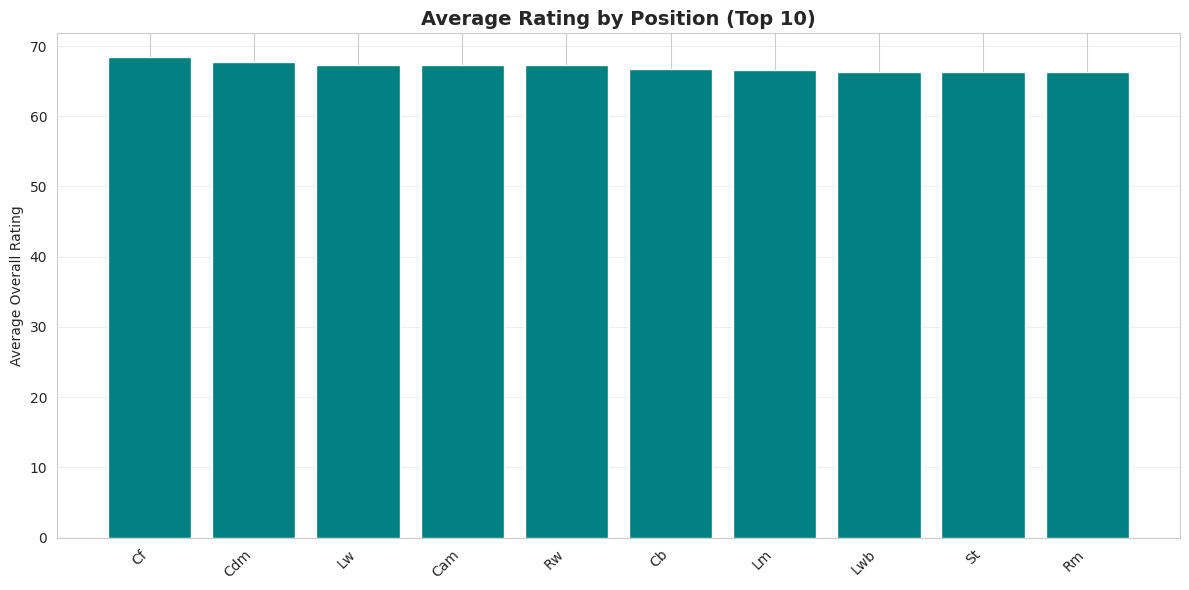


--- NATIONALITY ANALYSIS ---

Top 10 Nations by Average Player Rating:
             avg_rating  player_count
nationality                          
Portugal      71.113433           335
Brazil        71.051683           832
Cape Verde    70.952381            21
Algeria       70.866667            60
Uruguay       70.748148           135
Egypt         70.483871            31
Peru          70.333333            36
Ukraine       70.318841            69
Serbia        70.030534           131
Morocco       69.809524            84

--- MARKET VALUE ANALYSIS ---

Top 10 Most Valuable Players:
        name  age  overall_rating  value_euro  wage_euro
    L. Messi   31              94   4512500.0    21000.0
  C. Eriksen   27              88   4512500.0    21000.0
    P. Pogba   25              88   4512500.0    21000.0
  L. Insigne   27              88   4512500.0    21000.0
K. Koulibaly   27              88   4512500.0    21000.0
 V. Van Dijk   27              88   4512500.0    21000.0
   K. Mbapp

In [17]:
# ============================================================================
# SECTION 5: ADVANCED ANALYSIS
# ============================================================================
print("\n" + "="*80)
print("ADVANCED ANALYSIS - INSIGHTS AND PATTERNS")
print("="*80)

# 5.1: Top Players Analysis
print("\n--- TOP PLAYERS ANALYSIS ---")

if 'overall_rating' in df_engineered.columns and 'name' in df_engineered.columns:
    print("\nTop 10 Players by Overall Rating:")
    top_players = df_engineered.nlargest(10, 'overall_rating')[['name', 'age', 'nationality',
                                                                  'overall_rating', 'potential']]
    print(top_players.to_string(index=False))

if 'potential' in df_engineered.columns and 'name' in df_engineered.columns:
    print("\nTop 10 Young Prospects (by Growth Potential):")
    if 'growth_potential' in df_engineered.columns:
        young_prospects = df_engineered[df_engineered['age'] <= 23].nlargest(10, 'growth_potential')[
            ['name', 'age', 'overall_rating', 'potential', 'growth_potential']]
        print(young_prospects.to_string(index=False))

# 5.2: Position Analysis
print("\n--- POSITION ANALYSIS ---")

if 'primary_position' in df_engineered.columns and 'overall_rating' in df_engineered.columns:
    print("\nAverage Rating by Position:")
    position_stats = df_engineered.groupby('primary_position')['overall_rating'].agg(['mean', 'count'])
    position_stats = position_stats.sort_values('mean', ascending=False).head(10)
    print(position_stats)

    # Visualize
    plt.figure(figsize=(12, 6))
    plt.bar(range(len(position_stats)), position_stats['mean'], color='teal')
    plt.xticks(range(len(position_stats)), position_stats.index, rotation=45, ha='right')
    plt.ylabel('Average Overall Rating')
    plt.title('Average Rating by Position (Top 10)', fontsize=14, fontweight='bold')
    plt.grid(True, alpha=0.3, axis='y')
    plt.tight_layout()
    plt.show()

# 5.3: Nationality Analysis
print("\n--- NATIONALITY ANALYSIS ---")

if 'nationality' in df_engineered.columns and 'overall_rating' in df_engineered.columns:
    print("\nTop 10 Nations by Average Player Rating:")
    # Only consider nations with at least 20 players
    nation_stats = df_engineered.groupby('nationality').agg({
        'overall_rating': ['mean', 'count']
    })
    nation_stats.columns = ['avg_rating', 'player_count']
    nation_stats = nation_stats[nation_stats['player_count'] >= 20]
    nation_stats = nation_stats.sort_values('avg_rating', ascending=False).head(10)
    print(nation_stats)

# 5.4: Value Analysis
print("\n--- MARKET VALUE ANALYSIS ---")

if 'value_euro' in df_engineered.columns and 'name' in df_engineered.columns:
    print("\nTop 10 Most Valuable Players:")
    valuable_players = df_engineered.nlargest(10, 'value_euro')[
        ['name', 'age', 'overall_rating', 'value_euro', 'wage_euro']]
    print(valuable_players.to_string(index=False))

if 'value_wage_ratio' in df_engineered.columns:
    print("\nTop 10 Best Value-for-Money Players:")
    value_players = df_engineered[df_engineered['overall_rating'] >= 75].nlargest(10, 'value_wage_ratio')[
        ['name', 'age', 'overall_rating', 'value_euro', 'wage_euro', 'value_wage_ratio']]
    print(value_players.to_string(index=False))


In [19]:
# ============================================================================
# SECTION 6: FINAL SUMMARY AND EXPORT
# ============================================================================
print("\n" + "="*80)
print("FINAL SUMMARY")
print("="*80)

print(f"\n📊 DATASET TRANSFORMATION SUMMARY:")
print(f"   Original dataset:   {df.shape[0]} players × {df.shape[1]} features")
print(f"   Cleaned dataset:    {df_clean.shape[0]} players × {df_clean.shape[1]} features")
print(f"   Engineered dataset: {df_engineered.shape[0]} players × {df_engineered.shape[1]} features")
print(f"   Scaled dataset:     {df_scaled.shape[0]} players × {df_scaled.shape[1]} features")

print("\n📈 NEW FEATURES CREATED:")
new_features = set(df_engineered.columns) - set(df.columns)
print(f"   Total new features: {len(new_features)}")
for feature in sorted(list(new_features))[:15]:  # Show first 15
    print(f"   • {feature}")
if len(new_features) > 15:
    print(f"   ... and {len(new_features) - 15} more")

print("\n--- Final Dataset Info ---")
print(df_engineered.info())

print("\n--- Final Statistical Summary ---")
print(df_engineered.describe())

# Save processed datasets
print("\n--- Saving Processed Datasets ---")
df_clean.to_csv('fifa_players_cleaned.csv', index=False)
print("✓ Saved: fifa_players_cleaned.csv")

df_engineered.to_csv('fifa_players_engineered.csv', index=False)
print("✓ Saved: fifa_players_engineered.csv")

df_scaled.to_csv('fifa_players_scaled.csv', index=False)
print("✓ Saved: fifa_players_scaled.csv")



FINAL SUMMARY

📊 DATASET TRANSFORMATION SUMMARY:
   Original dataset:   17954 players × 51 features
   Cleaned dataset:    17954 players × 47 features
   Engineered dataset: 17954 players × 73 features
   Scaled dataset:     17954 players × 93 features

📈 NEW FEATURES CREATED:
   Total new features: 26
   • age_Experienced (31-35)
   • age_Peak (26-30)
   • age_Prime (22-25)
   • age_Veteran (35+)
   • age_Young (≤21)
   • attacking_score
   • bmi
   • body_type_encoded
   • career_stage
   • defensive_score
   • growth_potential
   • mental_score
   • physical_score
   • pos_Defender
   • pos_Forward
   ... and 11 more

--- Final Dataset Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17954 entries, 0 to 17953
Data columns (total 73 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   name                           17954 non-null  object 
 1   full_name                      17954 non-null  ob